# SpatialTis: Python library for spatial analysis in multiplexed tissue imaging

SpatialTis use `annData`, so you can also use `Scanpy` for your analysis

Here is an example of analysis with `SpatialTis` and `Scanpy`

In [1]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import scanpy as sc
from pathlib import Path
import matplotlib.pyplot as plt
from time import time

from spatialtis import read_ROI, read_all_ROIs

import anndata as ad
from anndata import AnnData, read_h5ad

## Preprocessing
Mask, Channel Stack ---> Matrix

In [4]:
# this is the direcotry to example data
data_dir = Path().cwd() / 'data'
test_dir = data_dir / 'Patients' / 'HPAP002' / 'Head'
meta_dir = data_dir / 'metadata.csv'

# Initiate a Reader to add all file to annData object
all_rois = read_all_ROIs(data_dir / 'Patients', ['Patient','Part', 'ROI']) \
.config_file(meta_dir,channel_col='channels', marker_col='markers')

My dual core mac with ssd takes 10~15s each ROI.

In [6]:
data = all_rois.to_anndata()

Detected 8457 cells.
Added: HPAP005 Body ROI1
Detected 7749 cells.
Added: HPAP005 Body ROI2
Detected 6843 cells.
Added: HPAP005 Body ROI3
Detected 10531 cells.
Added: HPAP005 Tail ROI1
Detected 9251 cells.
Added: HPAP005 Tail ROI2
Detected 10040 cells.
Added: HPAP005 Tail ROI3
Detected 7893 cells.
Added: HPAP005 Head ROI1
Detected 7997 cells.
Added: HPAP005 Head ROI2
Detected 8421 cells.
Added: HPAP005 Head ROI3
Detected 9042 cells.
Added: HPAP002 Body ROI1
Detected 7752 cells.
Added: HPAP002 Body ROI2
Detected 9138 cells.
Added: HPAP002 Body ROI4
Detected 7319 cells.
Added: HPAP002 Tail ROI1
Detected 8775 cells.
Added: HPAP002 Tail ROI2
Detected 8681 cells.
Added: HPAP002 Tail ROI3
Detected 7845 cells.
Added: HPAP002 Head ROI1
Detected 7450 cells.
Added: HPAP002 Head ROI2
Detected 8853 cells.
Added: HPAP002 Head ROI4


Save data for further analysis

In [7]:
data.write('test.h5ad')

... storing 'Patient' as categorical
... storing 'Part' as categorical
... storing 'ROI' as categorical
... storing 'Markers' as categorical


## Cell PhenoTyping
We will use `scanpy` to sort cell type.

You can check [Scanpy-Tutorial](https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html) for the usage and example

In [14]:
data = read_h5ad('test.h5ad')

In [8]:
sc.tl.pca(data, svd_solver='arpack')

In [ ]:
sc.pp.neighbors(data)
sc.tl.umap(data)
sc.tl.leiden(data)

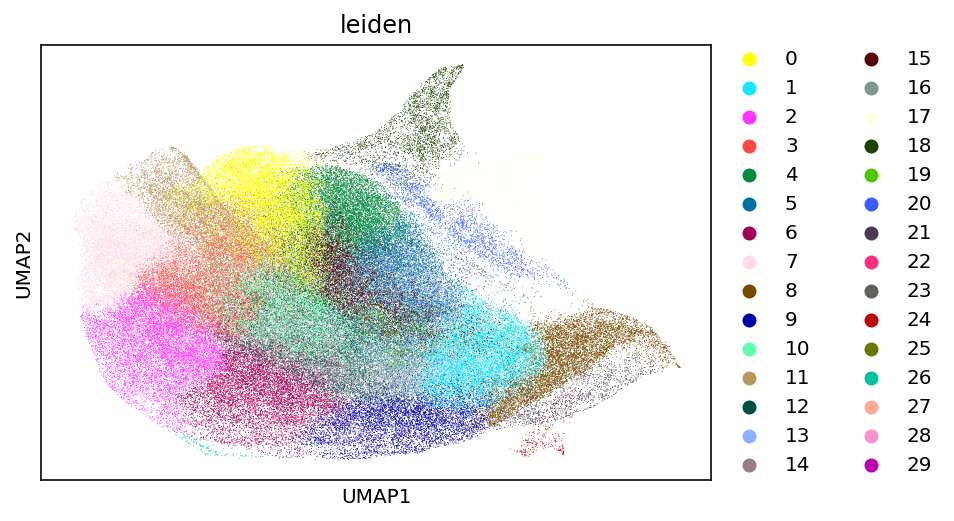

In [13]:
sc.pl.umap(data, color=['leiden'])

In [15]:
data.write(filename="tmp/test_adata.h5ad")

In [16]:
data

AnnData object with n_obs × n_vars = 152037 × 36 
    obs: 'Patient', 'Part', 'ROI', 'cell_shape', 'leiden'
    var: 'Channels', 'Markers'
    uns: 'pca', 'neighbors', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [27]:
from collections import (Counter, OrderedDict)
from typing import List, Dict